In [47]:
import cv2
import mediapipe as mp
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

Some Important Parameters used. 

1. **static_image_mode** : default set to *False*. Used for video, the first frame pose_landmarks are detected by detector. Following this 
the landmarks for next images are tracked by tracker. If the tracker can't track the landmark the the detector again detects the landmarks and this
process continues. 

2. **model_complexity**: Value ranges for 0 to 2. O refer to Lightest model and 2 refer to heavy model. Lighter model are faster but less accurate.

3. **smooth_landmark**: default set to *True*. Removes jitters of landmarks. if *static_image_mode* is set to True then this features get ignored. 

4. **min_detection_confidence**: default to 0.5. Less than this threshold are not considered. 

5. **min_tracking_confidence**: default to 0.5. Less than this threshold then tracking is not considerd succesfull. 

6. **enable_segmentation**: if set to True, also output segementation result. 

7. **smooth_segmentation**: Default True. Filter Segmentation mask across different images to reduce jitters. 

In [7]:
##importing images

img=cv2.imread('../images/cr7.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

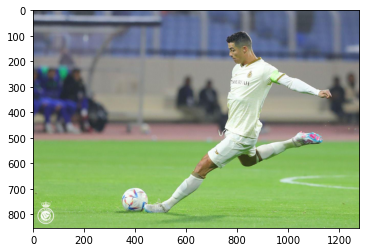

In [8]:
plt.imshow(img)

In [9]:
## Defining landmarks detection and visualization object

mp_pose=mp.solutions.pose
mp_drawing=mp.solutions.drawing_utils
mp_drawing_styles=mp.solutions.drawing_styles

In [52]:
## Detection of Pose in an Image

with mp_pose.Pose(static_image_mode=True,
             model_complexity=2,
             enable_segmentation=True,
             min_detection_confidence=0.5) as pose:
    
    results=pose.process(img) 

    

In [53]:
## Analysing the Result
pose_landmarks=results.pose_landmarks.landmark
pose=np.array([[pose_landmark.x,pose_landmark.y,pose_landmark.z,pose_landmark.visibility] for pose_landmark in pose_landmarks])

In [50]:
pose_df=pd.DataFrame(data=pose,columns=['x','y','z','Vis'])

In [51]:
pose_df

,x,y,z,Vis
0,0.611474,0.211186,-0.044737,0.999934
1,0.614115,0.190417,-0.063246,0.999951
2,0.617310,0.189458,-0.063539,0.999972
3,0.620400,0.188568,-0.063435,0.999969
4,0.610962,0.189074,-0.027972,0.999958
5,0.611620,0.187724,-0.028371,0.999973
6,0.612013,0.186459,-0.028480,0.999956
7,0.643455,0.182827,-0.093343,0.999987
8,0.629957,0.185575,0.065551,0.999888
9,0.623479,0.226781,-0.047347,0.999894


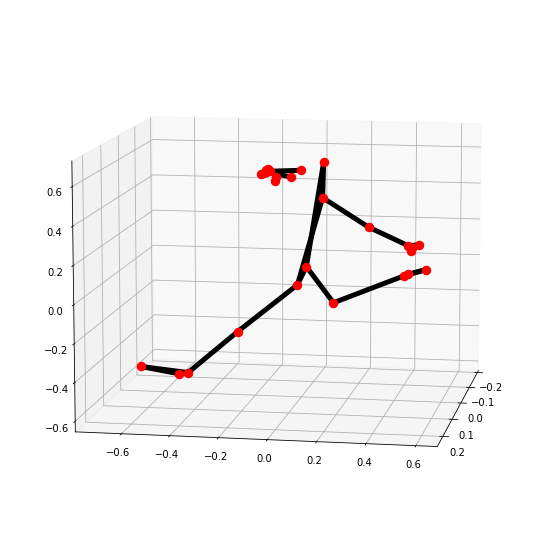

In [57]:
## Visualising the Pose 
BG_COLOR = (192, 192, 192) # gray
annotated_image = img.copy()
# Draw segmentation on the image.
# To improve segmentation around boundaries, consider applying a joint
# bilateral filter to "results.segmentation_mask" with "image".
# condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
bg_image = np.zeros(img.shape, dtype=np.uint8)
bg_image[:] = BG_COLOR
# annotated_image = np.where(condition, annotated_image, bg_image)
# Draw pose landmarks on the image.
mp_drawing.draw_landmarks(
    annotated_image,
    results.pose_landmarks,
    mp_pose.POSE_CONNECTIONS,
    landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
# cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
# Plot pose world landmarks.
mp_drawing.plot_landmarks(
    results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

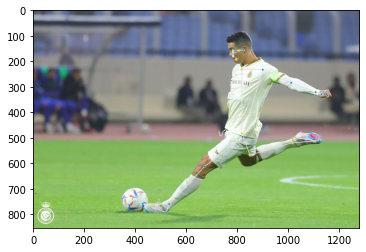

In [58]:
plt.imshow(annotated_image)

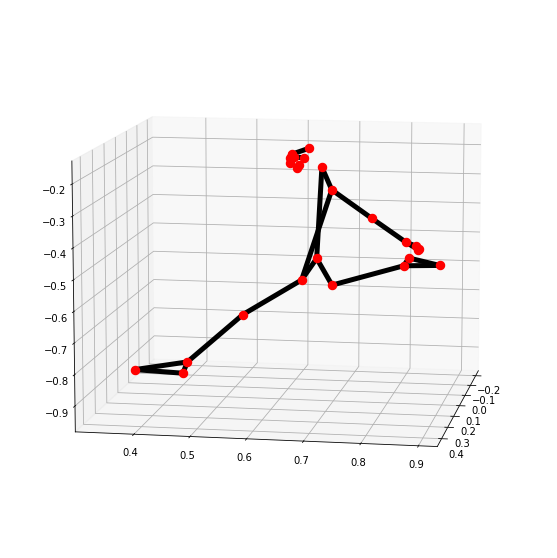

In [65]:
img_copy=img.copy()

mp_drawing.draw_landmarks(img_copy,
                          results.pose_landmarks,
                          mp_pose.POSE_CONNECTIONS,
                          landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
                          )

mp_drawing.plot_landmarks(results.pose_landmarks,mp_pose.POSE_CONNECTIONS)

In [67]:
type(plot)

NoneType

In [ ]:
mp_pose=mp.solutions.pose
mp.